In [3]:
import pandas as pd
import numpy as np

In [4]:
players = pd.read_csv("players_22.csv")


/var/folders/0k/57ldq89525g4jv49x_2gfg400000gn/T/ipykernel_1292/2412648025.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [5]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [6]:
players = players.dropna(subset=features)

In [7]:
#players data set have many unwanted coulmns so we create new df to use 
data = players[features].copy()


In [8]:
#scaling data 1-10

data= (data- data.min()) / (data.max()-data.min())*9 +1

In [10]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [59]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [60]:
centroids= random_centroids(data, 5)

In [61]:
centroids

,0,1,2,3,4
overall,6.086957,2.760870,4.130435,3.934783,6.086957
potential,6.478261,5.695652,3.739130,4.521739,5.304348
wage_eur,1.038627,3.072961,1.038627,1.005150,1.038627
value_eur,1.124846,1.009789,1.064534,1.042497,1.166601
age,4.000000,5.333333,2.333333,5.000000,5.666667


In [62]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)


In [63]:
labels= get_labels(data, centroids)

In [64]:
labels.value_counts()

0    5367
3    5138
2    5114
4    3545
1       1
dtype: int64

In [65]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [67]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()



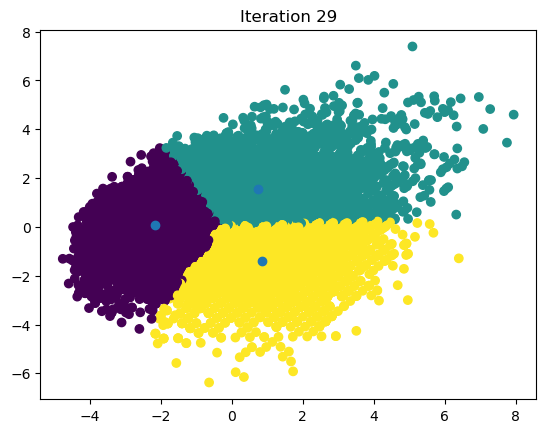

In [83]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [70]:
players[labels == 0][["short_name"] + features]


,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,3000.0,1500000.0,17
13256,L. Bate,63,83,5000.0,1300000.0,18
13351,Llabrés,63,81,3000.0,1200000.0,19
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [71]:
from sklearn.cluster import KMeans


In [72]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [73]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T


,0,1,2
overall,6.231096,3.599859,4.800991
potential,6.623746,5.205869,4.503972
wage_eur,1.657093,1.039947,1.112902
value_eur,1.413686,1.035792,1.040011
age,4.139879,2.712386,5.609167
